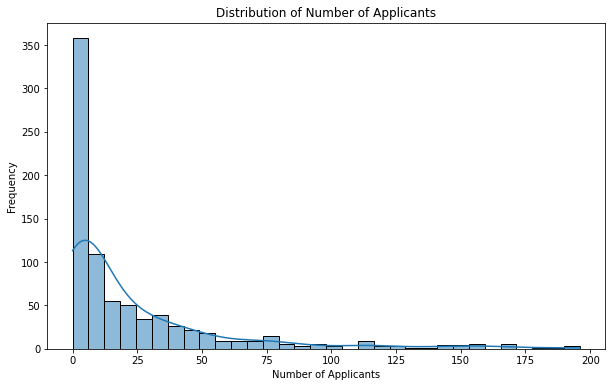

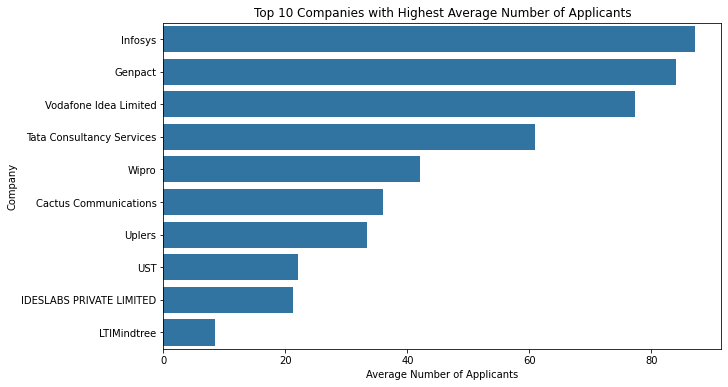

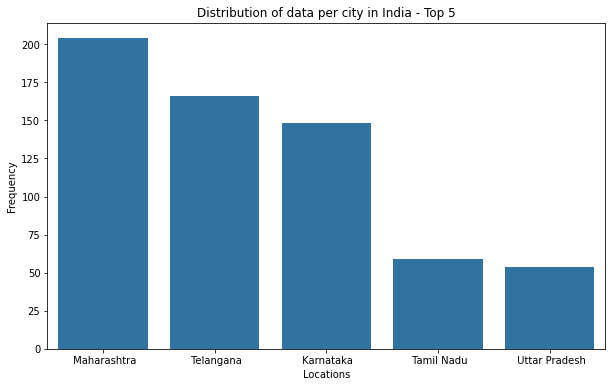

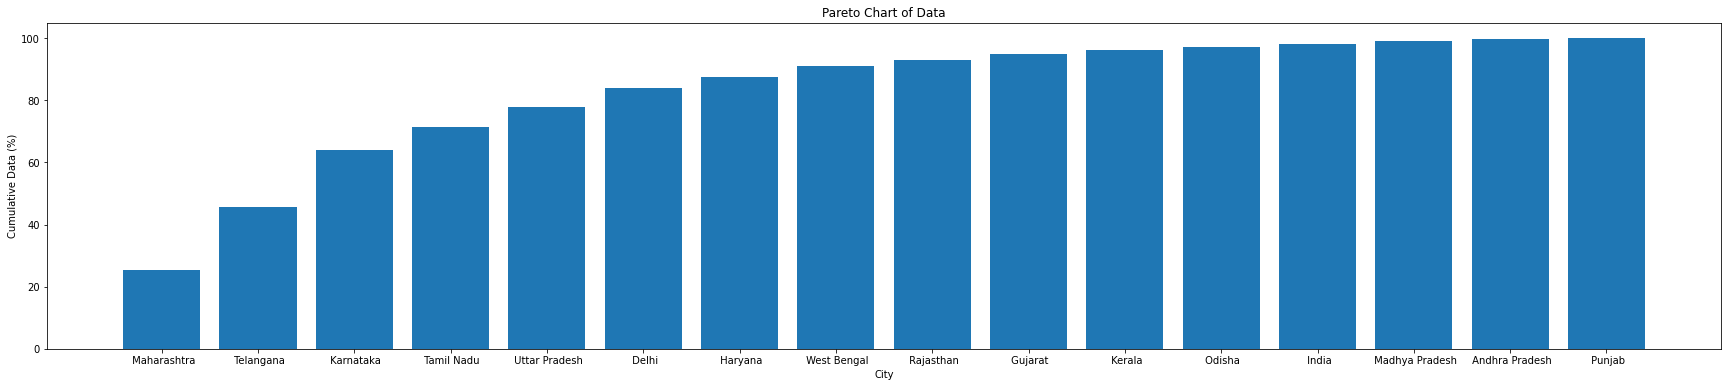

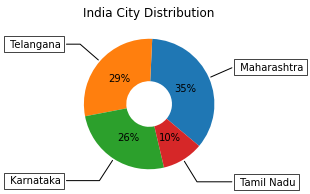

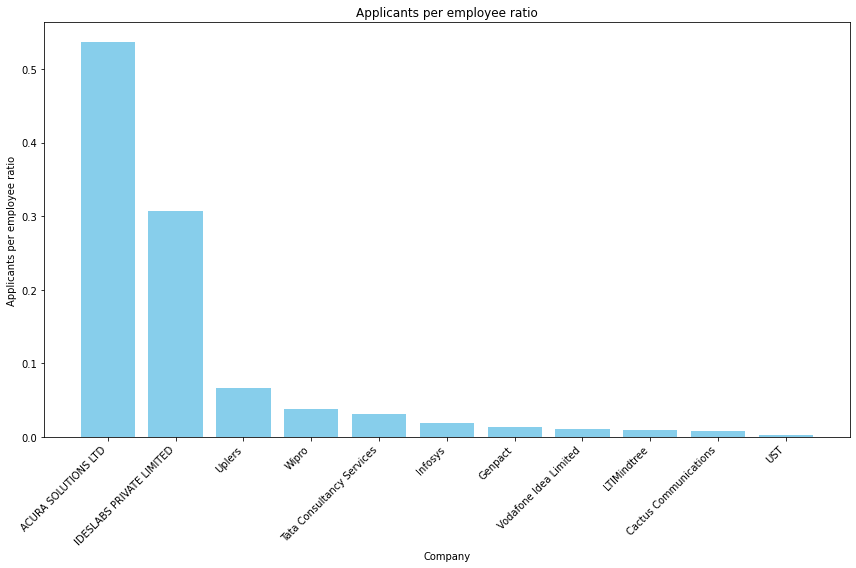

In [6]:
'''Step 1 : importing libraries'''
# Import Libraries to preprocesing Data
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/Jhonnatan7br/LinkedIn-Tech/main/LinkedIn%20Tech%20jobs%20-%20Informatic%20and%20Telecoms.csv'
df = pd.read_csv(url,  sep=",")

missing_values = df.isnull().sum()
df = df.drop_duplicates()
df = df.dropna()
numerical_summary = df.describe()
missing_values, numerical_summary

plt.figure(figsize=(10, 6))
sns.histplot(df['Total_applicants'], kde=True)
plt.title('Distribution of Number of Applicants')
plt.xlabel('Number of Applicants')
plt.ylabel('Frequency')
plt.show()

avg_applicants_per_company = df.groupby('Company_Name')['Total_applicants'].mean()
top_10_companies_applicants = avg_applicants_per_company.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_companies_applicants.values, y=top_10_companies_applicants.index)
plt.title('Top 10 Companies with Highest Average Number of Applicants')
plt.xlabel('Average Number of Applicants')
plt.ylabel('Company')
plt.show()


Top_5_cities_india= df['Location'].value_counts().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x= Top_5_cities_india.index, y=Top_5_cities_india.values)
plt.xlabel('Locations')
plt.ylabel('Frequency')
plt.title('Distribution of data per city in India - Top 5')
plt.show()

cumulative_data = np.cumsum(df['Location'].value_counts().sort_values(ascending=False)) / np.sum(df['Location'].value_counts().sort_values(ascending=False)) * 100
plt.figure(figsize=(30, 6))
plt.bar(df['Location'].value_counts().sort_values(ascending=False).index, cumulative_data)
plt.xlabel('City')
plt.ylabel('Cumulative Data (%)')
plt.title('Pareto Chart of Data')
plt.show()

# Create a subplot with a specific aspect ratio
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# Get the top 4 locations with the highest frequency from the 'Location' column
labels = df['Location'].value_counts().sort_values(ascending=False).head(4).index

# Get the corresponding counts for the top 4 locations
values = df['Location'].value_counts().sort_values(ascending=False).tolist()[:4]

# Create a pie chart with specified parameters
wedges, texts, autotexts = ax.pie(values, wedgeprops=dict(width=0.65), startangle=-40, autopct='%.0f%%')

# Define properties for the annotation box
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)

# Create a dictionary of keyword arguments (kw) for annotation
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

# Loop through the wedges (slices) in the pie chart
for i, p in enumerate(wedges):
    # Calculate the angle at the center of the wedge
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    
    # Determine the horizontal alignment of the annotation
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    
    # Define the connection style for the annotation arrow
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    
    # Update the arrowprops and annotate the label
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

# Set the title of the pie chart
ax.set_title("India City Distribution")

# Display the pie chart
plt.show()


grouped_df = df.groupby(['Company_Name', 'Location', 'Designation']).agg({
    'Total_applicants': 'sum',
    'Employee_count': 'mean'
}).reset_index()

grouped_df['Applicants per employee ratio'] = grouped_df['Total_applicants'] / grouped_df['Employee_count']

grouped_df = grouped_df.sort_values(by='Applicants per employee ratio', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(grouped_df['Company_Name'], grouped_df['Applicants per employee ratio'], color='skyblue')
plt.xlabel('Company')
plt.ylabel('Applicants per employee ratio')
plt.title('Applicants per employee ratio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()